In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
df=pd.read_csv('csv/train.csv')

In [8]:
df.columns.unique()

Index(['house_id', 'buid_date', 'date_priced', 'garden', 'dst_dock',
       'dst_capital', 'dst_mkt', 'dst_tower', 'dst_river', 'renovation',
       'dining_rooms', 'bedrooms', 'bathrooms', 'king_visit', 'curse',
       'king_blessing', 'farm_land', 'locations', 'holy_tree', 'dst_knight',
       'builder', 'price'],
      dtype='object')

In [9]:
#count() return no. of not null entries....
df.locations.count()

14829

In [10]:
#sum() return total of all data in column.....
df.dst_dock.sum()

688053.7257569992

In [11]:
df.locations.unique()

array(["King's Landing", 'The Mountains', nan, "Servant's Premises",
       'Cursed Land'], dtype=object)

In [12]:
#encode locations
ser=pd.Series([0,1,2,3,4],df.locations.unique())
df.locations.replace(ser,inplace=True)

In [13]:
#

In [14]:
#encode farm land....
print(df.farm_land.unique())
ser1=pd.Series([0,1,2],df.farm_land.unique())
df.farm_land.replace(ser1,inplace=True)

['small' 'no' 'huge']


In [15]:
#encode builder
print(df.builder.unique())
ser2=pd.Series(np.arange(0,11),df.builder.unique())
print(ser2)
df.builder.replace(ser2,inplace=True)

['Bob' 'The_Starks' 'Not_Known' 'The_Kings' 'The_Greens' 'Wood_Priests'
 'Masters_of_Stones' 'Bright_Brothers' 'The_Overlords' 'The_Ollivers'
 'The_Lannisters']
Bob                   0
The_Starks            1
Not_Known             2
The_Kings             3
The_Greens            4
Wood_Priests          5
Masters_of_Stones     6
Bright_Brothers       7
The_Overlords         8
The_Ollivers          9
The_Lannisters       10
dtype: int32


In [16]:
df.describe()

,garden,dst_dock,dst_capital,dst_mkt,dst_tower,dst_river,renovation,dining_rooms,bedrooms,bathrooms,king_visit,curse,king_blessing,farm_land,locations,holy_tree,dst_knight,builder,price
count,14515.000000,14859.000000,15669.000000,14146.000000,15956.000000,16500.000000,14871.000000,14862.000000,15851.000000,15536.000000,16500.000000,15502.000000,16500.000000,16500.000000,16500.000000,13234.000000,15669.000000,16500.000000,1.650000e+04
mean,0.096659,46.305520,42.674021,48.715817,101.110421,30.288848,0.195817,3.001615,3.001514,3.007209,0.085030,0.149336,115.142545,0.539576,1.693394,0.870107,53.169633,4.641333,1.306901e+06
std,0.295503,35.131047,34.365941,34.960087,66.389095,22.036027,0.396842,0.816358,0.813605,0.820371,0.278935,0.356430,34.806516,0.838464,1.302063,0.336198,34.367460,2.658463,1.628483e+05
min,0.000000,0.000288,0.000714,0.011985,0.012093,0.007765,0.000000,2.000000,2.000000,2.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,10.035601,0.000000,6.250830e+05
25%,0.000000,17.746333,14.876478,20.455767,47.177363,12.515697,0.000000,2.000000,2.000000,2.000000,0.000000,0.000000,90.000000,0.000000,1.000000,1.000000,25.383901,3.000000,1.208923e+06
50%,0.000000,37.969819,33.599468,41.463328,91.626909,25.352928,0.000000,3.000000,3.000000,3.000000,0.000000,0.000000,124.000000,0.000000,1.000000,1.000000,44.084289,4.000000,1.330423e+06
75%,0.000000,68.468817,63.844377,71.184760,146.311675,44.503404,0.000000,4.000000,4.000000,4.000000,0.000000,0.000000,144.000000,1.000000,3.000000,1.000000,74.390126,6.000000,1.425944e+06
max,1.000000,157.658673,156.893349,157.857240,297.334188,99.260600,1.000000,4.000000,4.000000,4.000000,1.000000,1.000000,160.000000,2.000000,4.000000,1.000000,167.131365,10.000000,1.747559e+06


In [17]:
def to_date2(row):
    x=datetime.strptime(row['date_priced'], '%m/%d/%Y %I:%M %p')
    return x
def to_date1(row):
    x=datetime.strptime(row['buid_date'], '%m/%d/%Y %I:%M %p')
    return x
def fun_b_year(row):
    x=row['build_date']
    return x.year

def fun_p_year(row):
    x=row['date_priced']
    return x.year

df['buid_date']=df.apply(lambda i:to_date1(i),axis=1)
df['date_priced']=df.apply(lambda i:to_date2(i),axis=1)

#df['build_year']=df.apply(lambda i:fun_b_year(i),axis=1)
#df['priced_year']=df.apply(lambda i:fun_p_year(i),axis=1)

In [18]:
x=df['buid_date']

In [19]:
#df=df.convert_objects(convert_numeric=True)

In [20]:
for i in range (0, df.index.size):
    df.loc[i,'house_age']=(df.loc[i,'date_priced']-df.loc[i,'buid_date']).days
    df.loc[i,'build_year']=(df.loc[i,'buid_date']).year
    df.loc[i,'priced_year']=(df.loc[i,'date_priced']).year

In [21]:
df.head()

,house_id,buid_date,date_priced,garden,dst_dock,dst_capital,dst_mkt,dst_tower,dst_river,renovation,...,king_blessing,farm_land,locations,holy_tree,dst_knight,builder,price,house_age,build_year,priced_year
0,6e32cec0,1602-04-21 00:41:00,1609-07-09 01:11:00,0.0,138.600639,0.256239,69.486467,14.394903,63.109038,0.0,...,160,0,0,1.0,10.505662,0,1470912.0,2636.0,1602.0,1609.0
1,6e32cec4,1600-08-23 00:25:00,1612-05-02 22:32:00,1.0,16.254871,26.882222,34.145238,101.052598,53.249336,0.0,...,133,1,1,NaN,37.249456,1,1241030.0,4270.0,1600.0,1612.0
2,6e32cec9,1600-05-05 11:39:00,1608-06-10 08:17:00,0.0,6.555428,136.448973,78.445508,88.480988,72.245533,0.0,...,24,0,2,1.0,146.553349,2,838723.0,2957.0,1600.0,1608.0
3,6e32cece,1603-02-10 20:51:00,1611-06-05 23:44:00,0.0,79.724550,19.885265,92.698917,22.395136,8.059939,0.0,...,140,0,1,NaN,29.921162,3,1267804.0,3037.0,1603.0,1611.0
4,6e32ced1,1603-01-05 02:46:00,1610-10-08 05:18:00,0.0,101.541256,0.519507,3.605055,81.449646,35.706541,0.0,...,159,2,1,1.0,10.855780,4,1497166.0,2833.0,1603.0,1610.0


In [22]:
df.describe()

,garden,dst_dock,dst_capital,dst_mkt,dst_tower,dst_river,renovation,dining_rooms,bedrooms,bathrooms,...,king_blessing,farm_land,locations,holy_tree,dst_knight,builder,price,house_age,build_year,priced_year
count,14515.000000,14859.000000,15669.000000,14146.000000,15956.000000,16500.000000,14871.000000,14862.000000,15851.000000,15536.000000,...,16500.000000,16500.000000,16500.000000,13234.000000,15669.000000,16500.000000,1.650000e+04,16500.000000,16500.000000,16500.000000
mean,0.096659,46.305520,42.674021,48.715817,101.110421,30.288848,0.195817,3.001615,3.001514,3.007209,...,115.142545,0.539576,1.693394,0.870107,53.169633,4.641333,1.306901e+06,2374.200242,1603.004727,1609.500242
std,0.295503,35.131047,34.365941,34.960087,66.389095,22.036027,0.396842,0.816358,0.813605,0.820371,...,34.806516,0.838464,1.302063,0.336198,34.367460,2.658463,1.628483e+05,972.831482,2.003839,1.705569
min,0.000000,0.000288,0.000714,0.011985,0.012093,0.007765,0.000000,2.000000,2.000000,2.000000,...,3.000000,0.000000,0.000000,0.000000,10.035601,0.000000,6.250830e+05,30.000000,1600.000000,1607.000000
25%,0.000000,17.746333,14.876478,20.455767,47.177363,12.515697,0.000000,2.000000,2.000000,2.000000,...,90.000000,0.000000,1.000000,1.000000,25.383901,3.000000,1.208923e+06,1671.000000,1601.000000,1608.000000
50%,0.000000,37.969819,33.599468,41.463328,91.626909,25.352928,0.000000,3.000000,3.000000,3.000000,...,124.000000,0.000000,1.000000,1.000000,44.084289,4.000000,1.330423e+06,2371.000000,1603.000000,1609.000000
75%,0.000000,68.468817,63.844377,71.184760,146.311675,44.503404,0.000000,4.000000,4.000000,4.000000,...,144.000000,1.000000,3.000000,1.000000,74.390126,6.000000,1.425944e+06,3074.250000,1605.000000,1611.000000
max,1.000000,157.658673,156.893349,157.857240,297.334188,99.260600,1.000000,4.000000,4.000000,4.000000,...,160.000000,2.000000,4.000000,1.000000,167.131365,10.000000,1.747559e+06,4697.000000,1606.000000,1612.000000


In [ ]:
df.

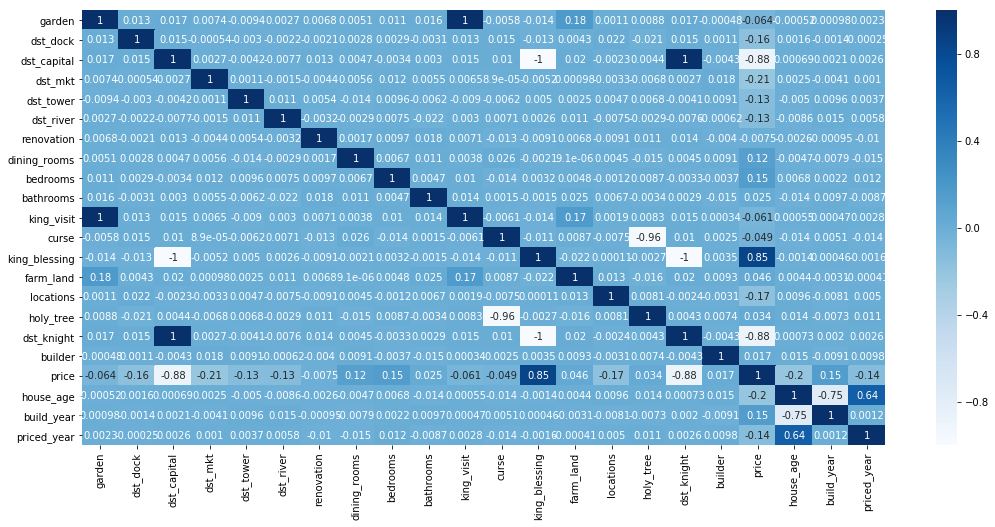

In [23]:
c=df.corr()
plt.figure(figsize=[18,8])
sns.heatmap(c,annot=True,cmap="Blues")

# king_blessing,dst_capital and dst_knight are correlated ..so keep only one ..
# king_visit and garden also same ,so delete 1 of them.
delete dst_capital and dst_knight

In [95]:
df.drop(['garden','dst_capital','dst_knight'],inplace=True,axis=1)

# too low correlation of renovation with price so drop it

In [96]:
df.drop(['renovation'],inplace=True,axis=1)

In [3]:
def p_index(df):
    print(df.isnull().sum())
    print(df.isnull().values.sum())
    print(df.dropna().index.size)
    return

In [4]:
def p_index(df):
    print(df.isnull().sum())
    print(df.isnull().values.sum())
    print(df.dropna().index.size)
    return

def p_heatmap(df):  
    c=df.corr()
    plt.figure(figsize=[18,8])
    sns.heatmap(c,annot=True,cmap="Blues")
    return

In [99]:
p_index(df)

house_id            0
buid_date           0
date_priced         0
dst_dock         1641
dst_mkt          2354
dst_tower         544
dst_river           0
dining_rooms     1638
bedrooms          649
bathrooms         964
king_visit          0
curse             998
king_blessing       0
farm_land           0
locations           0
holy_tree        3266
builder             0
price               0
house_age           0
build_year          0
priced_year         0
dtype: int64
12054
7589


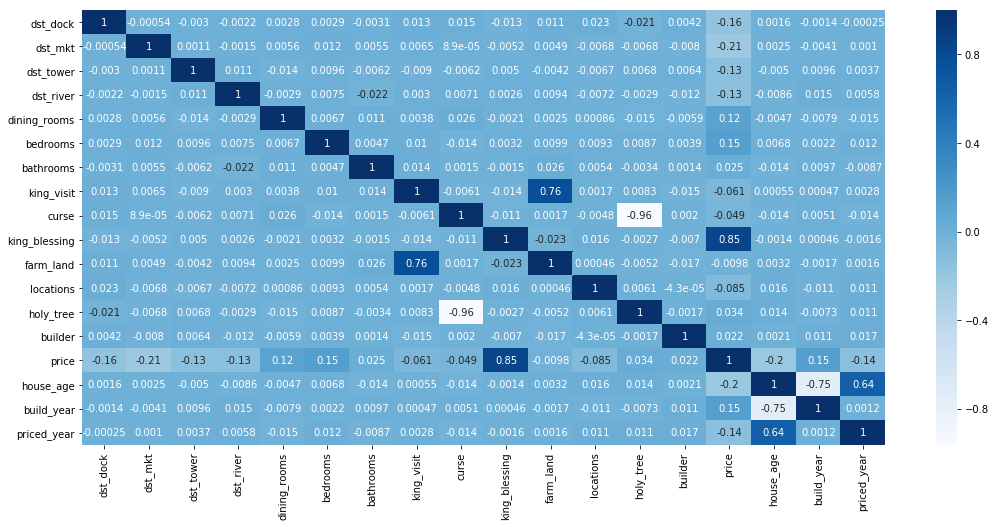

In [100]:
p_heatmap(df)

  # Low correlation b/w price and farm land so drop it...

In [101]:
df.drop('farm_land',axis=1,inplace=True)

In [102]:
df.to_csv('csv/proc_data.csv',index=False)

In [5]:
df=pd.read_csv('csv/proc_data.csv')

house_id            0
buid_date           0
date_priced         0
dst_dock         1641
dst_mkt          2354
dst_tower         544
dst_river           0
dining_rooms     1638
bedrooms          649
bathrooms         964
king_visit          0
curse             998
king_blessing       0
locations           0
holy_tree        3266
builder             0
price               0
house_age           0
build_year          0
priced_year         0
dtype: int64
12054
7589


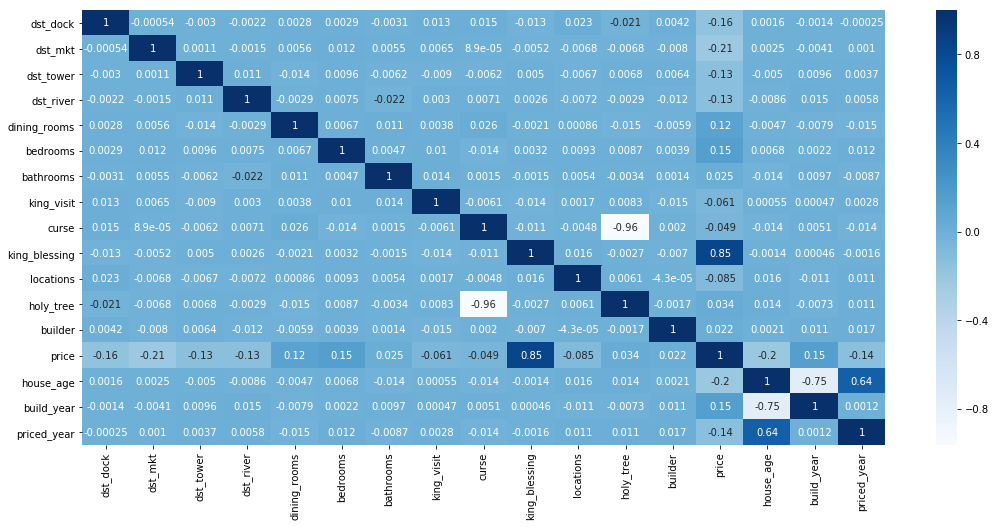

In [6]:
p_heatmap(df)
p_index(df)

# .96 correlation b/w curse and holy_tree...

so fillna of both columns with help of each other....

In [6]:

d1=df[['curse','holy_tree']]
d1=d1.fillna(-1)
p_index(d1)

for i in range (0,d1.index.size):
    if d1.loc[i,'curse']==-1 and d1.loc[i,'holy_tree']!=-1:
        d1.loc[i,'curse']=(d1.loc[i,'holy_tree']+1)%2

for i in range (0,d1.index.size):
    if d1.loc[i,'curse']!=-1 and d1.loc[i,'holy_tree']==-1:
        d1.loc[i,'holy_tree']=(d1.loc[i,'curse']+1)%2

d1[d1.curse==-1]=pd.np.nan
df['curse']=d1['curse']
df['holy_tree']=d1['holy_tree']


curse        0
holy_tree    0
dtype: int64
0
16500


In [7]:
#drop holy_tree column...........
df.drop('holy_tree',inplace=True,axis=1)

In [8]:
df

,house_id,buid_date,date_priced,dst_dock,dst_mkt,dst_tower,dst_river,dining_rooms,bedrooms,bathrooms,king_visit,curse,king_blessing,locations,builder,price,house_age,build_year,priced_year
0,6e32cec0,1602-04-21 00:41:00,1609-07-09 01:11:00,138.600639,69.486467,14.394903,63.109038,3.0,4.0,NaN,0,0.0,160,0,0,1470912.0,2636.0,1602.0,1609.0
1,6e32ceda,1603-10-23 23:14:00,1611-10-21 07:40:00,10.998322,63.794375,53.019891,17.045949,4.0,3.0,3.0,0,0.0,37,1,0,1052137.0,2919.0,1603.0,1611.0
2,6e32cf09,1603-03-18 03:53:00,1610-05-17 21:36:00,52.819705,96.656914,70.965631,6.548119,2.0,2.0,3.0,0,0.0,79,2,0,1017577.0,2617.0,1603.0,1610.0
3,6e32cfa9,1606-08-18 00:23:00,1608-01-20 10:45:00,82.283966,29.043012,119.126593,24.298255,NaN,2.0,3.0,0,1.0,156,2,0,1409057.0,520.0,1606.0,1608.0
4,6e32cfb7,1603-09-11 11:53:00,1611-05-20 16:49:00,34.524141,6.740951,222.341302,1.821655,4.0,2.0,4.0,0,0.0,74,1,0,1317434.0,2808.0,1603.0,1611.0
5,6e32cfd5,1601-06-13 13:25:00,1611-06-19 04:13:00,38.877415,NaN,76.196189,1.257721,3.0,3.0,3.0,0,0.0,135,3,0,1333643.0,3657.0,1601.0,1611.0
6,6e32d0c0,1606-01-19 12:50:00,1610-10-27 21:13:00,35.988844,67.579542,157.877738,15.756025,2.0,3.0,4.0,0,0.0,155,1,0,1462503.0,1742.0,1606.0,1610.0
7,6e32d0f3,1606-11-22 23:22:00,1611-01-13 11:32:00,83.914728,57.067604,147.898157,55.592034,2.0,4.0,4.0,0,1.0,53,1,0,930118.0,1512.0,1606.0,1611.0
8,6e32d166,1602-01-07 03:34:00,1607-01-02 15:19:00,64.288283,NaN,204.669501,60.009117,2.0,4.0,3.0,0,0.0,58,1,0,1014617.0,1821.0,1602.0,1607.0
9,6e32d234,1605-06-25 08:26:00,1608-03-11 20:21:00,59.504656,3.366960,63.397907,21.391704,4.0,3.0,3.0,0,0.0,130,0,0,1574362.0,990.0,1605.0,1608.0


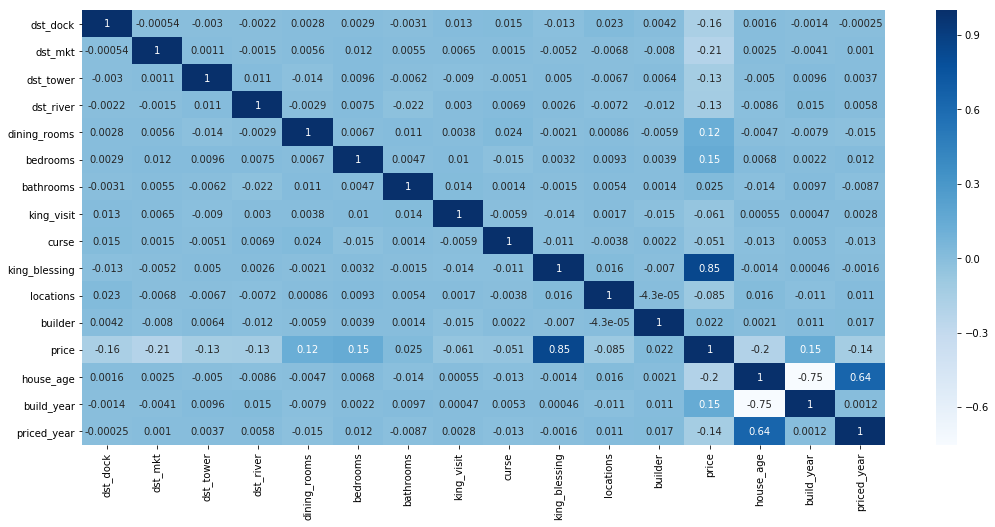

In [9]:
p_heatmap(df)

In [10]:
p_index(df)

house_id            0
buid_date           0
date_priced         0
dst_dock         1641
dst_mkt          2354
dst_tower         544
dst_river           0
dining_rooms     1638
bedrooms          649
bathrooms         964
king_visit          0
curse             202
king_blessing       0
locations           0
builder             0
price               0
house_age           0
build_year          0
priced_year         0
dtype: int64
7992
9899


In [10]:
#ffill fillna  to curse and bathrooms coz less correlation with price ...
df['curse'].fillna(method='ffill',inplace=True)
df['curse'].fillna(method='bfill',inplace=True)
df['bathrooms'].fillna(method='ffill',inplace=True)
df['bathrooms'].fillna(method='bfill',inplace=True)

In [11]:
p_index(df)

house_id            0
buid_date           0
date_priced         0
dst_dock         1641
dst_mkt          2354
dst_tower         544
dst_river           0
dining_rooms     1638
bedrooms          649
bathrooms           0
king_visit          0
curse               0
king_blessing       0
locations           0
builder             0
price               0
house_age           0
build_year          0
priced_year         0
dtype: int64
6826
10626


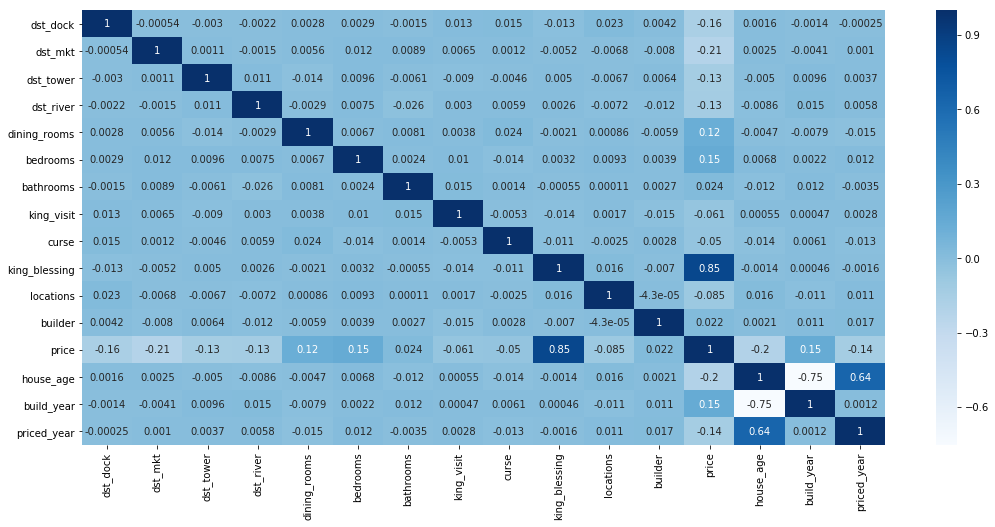

In [13]:
p_heatmap(df)

In [12]:
p_index(df)

house_id            0
buid_date           0
date_priced         0
dst_dock         1641
dst_mkt          2354
dst_tower         544
dst_river           0
dining_rooms     1638
bedrooms          649
bathrooms           0
king_visit          0
curse               0
king_blessing       0
locations           0
builder             0
price               0
house_age           0
build_year          0
priced_year         0
dtype: int64
6826
10626


In [13]:
d=df

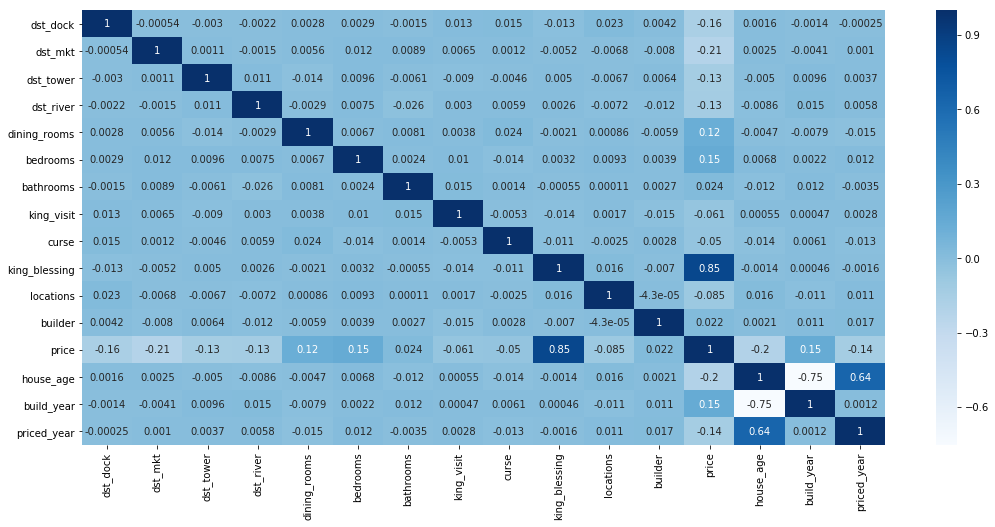

In [14]:

p_heatmap(d)

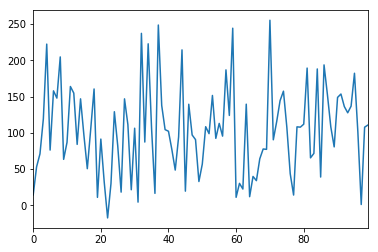

In [29]:
#plt.figure(figsize=(18,7))
d['dst_tower'][:100].interpolate(method='cubic').plot()

In [16]:
df.dtypes

house_id          object
buid_date         object
date_priced       object
dst_dock         float64
dst_mkt          float64
dst_tower        float64
dst_river        float64
dining_rooms     float64
bedrooms         float64
bathrooms        float64
king_visit         int64
curse            float64
king_blessing      int64
locations          int64
builder            int64
price            float64
house_age        float64
build_year       float64
priced_year      float64
dtype: object

In [15]:
d

,house_id,buid_date,date_priced,dst_dock,dst_mkt,dst_tower,dst_river,dining_rooms,bedrooms,bathrooms,king_visit,curse,king_blessing,locations,builder,price,house_age,build_year,priced_year
0,6e32cec0,1602-04-21 00:41:00,1609-07-09 01:11:00,138.600639,69.486467,14.394903,63.109038,3.0,4.0,3.0,0,0.0,160,0,0,1470912.0,2636.0,1602.0,1609.0
1,6e32ceda,1603-10-23 23:14:00,1611-10-21 07:40:00,10.998322,63.794375,53.019891,17.045949,4.0,3.0,3.0,0,0.0,37,1,0,1052137.0,2919.0,1603.0,1611.0
2,6e32cf09,1603-03-18 03:53:00,1610-05-17 21:36:00,52.819705,96.656914,70.965631,6.548119,2.0,2.0,3.0,0,0.0,79,2,0,1017577.0,2617.0,1603.0,1610.0
3,6e32cfa9,1606-08-18 00:23:00,1608-01-20 10:45:00,82.283966,29.043012,119.126593,24.298255,NaN,2.0,3.0,0,1.0,156,2,0,1409057.0,520.0,1606.0,1608.0
4,6e32cfb7,1603-09-11 11:53:00,1611-05-20 16:49:00,34.524141,6.740951,222.341302,1.821655,4.0,2.0,4.0,0,0.0,74,1,0,1317434.0,2808.0,1603.0,1611.0
5,6e32cfd5,1601-06-13 13:25:00,1611-06-19 04:13:00,38.877415,NaN,76.196189,1.257721,3.0,3.0,3.0,0,0.0,135,3,0,1333643.0,3657.0,1601.0,1611.0
6,6e32d0c0,1606-01-19 12:50:00,1610-10-27 21:13:00,35.988844,67.579542,157.877738,15.756025,2.0,3.0,4.0,0,0.0,155,1,0,1462503.0,1742.0,1606.0,1610.0
7,6e32d0f3,1606-11-22 23:22:00,1611-01-13 11:32:00,83.914728,57.067604,147.898157,55.592034,2.0,4.0,4.0,0,1.0,53,1,0,930118.0,1512.0,1606.0,1611.0
8,6e32d166,1602-01-07 03:34:00,1607-01-02 15:19:00,64.288283,NaN,204.669501,60.009117,2.0,4.0,3.0,0,0.0,58,1,0,1014617.0,1821.0,1602.0,1607.0
9,6e32d234,1605-06-25 08:26:00,1608-03-11 20:21:00,59.504656,3.366960,63.397907,21.391704,4.0,3.0,3.0,0,0.0,130,0,0,1574362.0,990.0,1605.0,1608.0


In [24]:
d.head(n=3)

,house_id,buid_date,date_priced,dst_dock,dst_mkt,dst_tower,dst_river,dining_rooms,bedrooms,bathrooms,king_visit,curse,king_blessing,locations,builder,price,house_age,build_year,priced_year
0,6e32cec0,1602-04-21 00:41:00,1609-07-09 01:11:00,138.600639,69.486467,14.394903,63.109038,3.0,4.0,3.0,0,0.0,160,0,0,1470912.0,2636.0,1602.0,1609.0
1,6e32ceda,1603-10-23 23:14:00,1611-10-21 07:40:00,10.998322,63.794375,53.019891,17.045949,4.0,3.0,3.0,0,0.0,37,1,0,1052137.0,2919.0,1603.0,1611.0
2,6e32cf09,1603-03-18 03:53:00,1610-05-17 21:36:00,52.819705,96.656914,70.965631,6.548119,2.0,2.0,3.0,0,0.0,79,2,0,1017577.0,2617.0,1603.0,1610.0


In [28]:
def drop_unused(df):
    df.drop('house_id',axis=1,inplace=True)
    df.drop('date_priced',axis=1,inplace=True)
    df.drop('buid_date',axis=1,inplace=True) 
    return df

In [29]:
d=drop_unused(d)

In [31]:
d.head(n=3)

,dst_dock,dst_mkt,dst_tower,dst_river,dining_rooms,bedrooms,bathrooms,king_visit,curse,king_blessing,locations,builder,price,house_age,build_year,priced_year
0,138.600639,69.486467,14.394903,63.109038,3.0,4.0,3.0,0,0.0,160,0,0,1470912.0,2636.0,1602.0,1609.0
1,10.998322,63.794375,53.019891,17.045949,4.0,3.0,3.0,0,0.0,37,1,0,1052137.0,2919.0,1603.0,1611.0
2,52.819705,96.656914,70.965631,6.548119,2.0,2.0,3.0,0,0.0,79,2,0,1017577.0,2617.0,1603.0,1610.0


In [42]:
d.build_year.unique().size

7

In [45]:
#encode build year
ser2=pd.Series(np.arange(0,d.build_year.unique().size),d.build_year.unique())
#encode priced year
ser3=pd.Series(np.arange(0,d.priced_year.unique().size),d.priced_year.unique())

In [47]:
ser3

1609.0    0
1611.0    1
1610.0    2
1608.0    3
1607.0    4
1612.0    5
dtype: int32

In [51]:
w.build_year.replace(ser2,inplace=True)
w.priced_year.replace(ser3,inplace=True)

In [54]:
p_index(w)

dst_dock         1641
dst_mkt          2354
dst_tower         544
dst_river           0
dining_rooms     1638
bedrooms          649
bathrooms           0
king_visit          0
curse               0
king_blessing       0
locations           0
builder             0
price               0
house_age           0
build_year          0
priced_year         0
dtype: int64
6826
10626


In [55]:
w.head()

,dst_dock,dst_mkt,dst_tower,dst_river,dining_rooms,bedrooms,bathrooms,king_visit,curse,king_blessing,locations,builder,price,house_age,build_year,priced_year
0,138.600639,69.486467,14.394903,63.109038,3.0,4.0,3.0,0,0.0,160,0,0,1470912.0,2636.0,0.0,0.0
1,10.998322,63.794375,53.019891,17.045949,4.0,3.0,3.0,0,0.0,37,1,0,1052137.0,2919.0,1.0,1.0
2,52.819705,96.656914,70.965631,6.548119,2.0,2.0,3.0,0,0.0,79,2,0,1017577.0,2617.0,1.0,2.0
3,82.283966,29.043012,119.126593,24.298255,NaN,2.0,3.0,0,1.0,156,2,0,1409057.0,520.0,2.0,3.0
4,34.524141,6.740951,222.341302,1.821655,4.0,2.0,4.0,0,0.0,74,1,0,1317434.0,2808.0,1.0,1.0


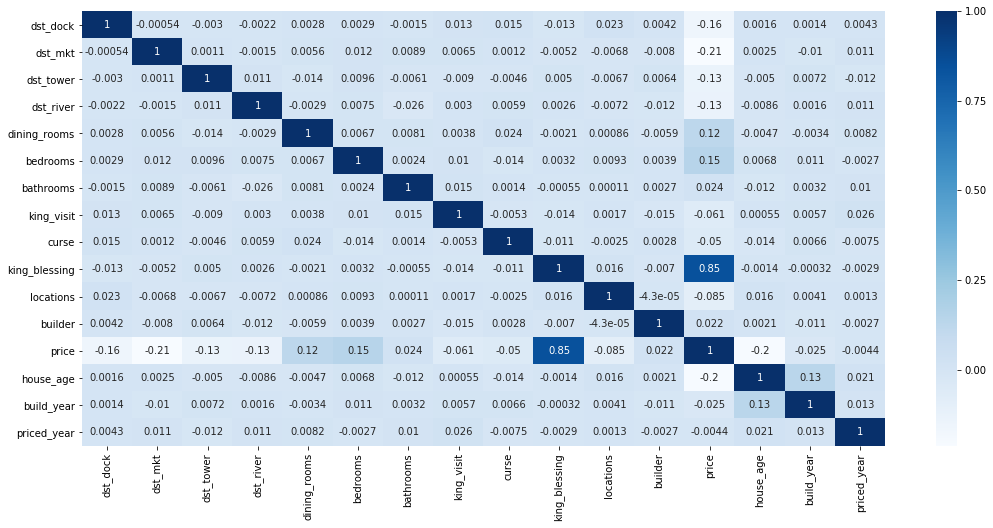

In [56]:
p_heatmap(w)

In [57]:
w.to_csv('csv/w_proc_data.csv',index=False)

In [58]:
w=pd.read_csv('csv/w_proc_data.csv')

In [59]:
w.head()

,dst_dock,dst_mkt,dst_tower,dst_river,dining_rooms,bedrooms,bathrooms,king_visit,curse,king_blessing,locations,builder,price,house_age,build_year,priced_year
0,138.600639,69.486467,14.394903,63.109038,3.0,4.0,3.0,0,0.0,160,0,0,1470912.0,2636.0,0.0,0.0
1,10.998322,63.794375,53.019891,17.045949,4.0,3.0,3.0,0,0.0,37,1,0,1052137.0,2919.0,1.0,1.0
2,52.819705,96.656914,70.965631,6.548119,2.0,2.0,3.0,0,0.0,79,2,0,1017577.0,2617.0,1.0,2.0
3,82.283966,29.043012,119.126593,24.298255,NaN,2.0,3.0,0,1.0,156,2,0,1409057.0,520.0,2.0,3.0
4,34.524141,6.740951,222.341302,1.821655,4.0,2.0,4.0,0,0.0,74,1,0,1317434.0,2808.0,1.0,1.0


In [61]:
w1=w.interpolate()

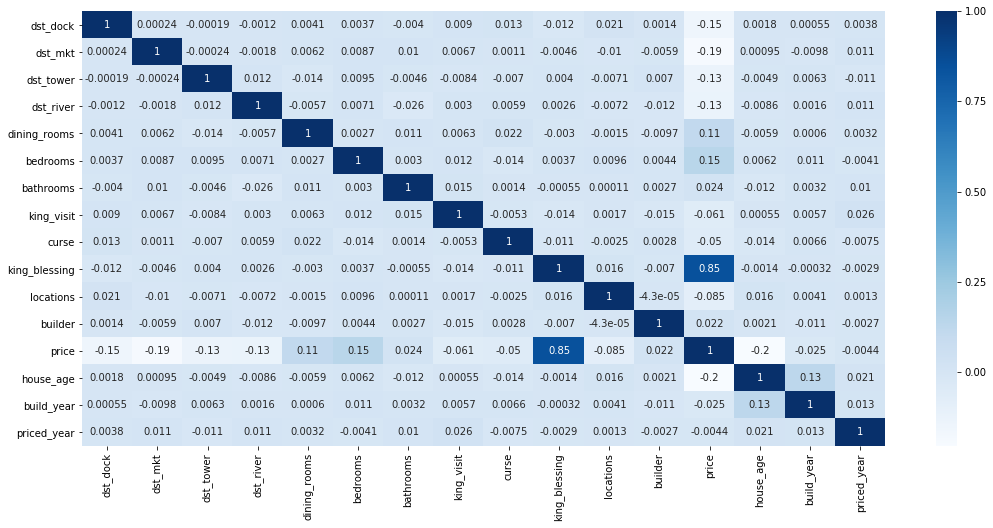

In [63]:
p_heatmap(w1)

In [ ]:
w1

In [64]:
test=pd.read_csv('csv/test.csv')

In [65]:
test

,house_id,buid_date,date_priced,garden,dst_dock,dst_capital,dst_mkt,dst_tower,dst_river,renovation,...,bedrooms,bathrooms,king_visit,curse,king_blessing,farm_land,locations,holy_tree,dst_knight,builder
0,6e33d051,10/19/1600 8:21 PM,10/19/1612 7:59 AM,0.0,13.943795,66.361720,17.472071,54.192768,78.604543,0.0,...,2.0,4.0,0,0.0,94,small,NaN,1.0,76.513349,Bob
1,6e33d0e0,9/7/1604 5:13 PM,5/15/1607 3:32 PM,0.0,54.614026,69.493909,51.702360,175.727267,4.314068,1.0,...,2.0,2.0,0,1.0,91,small,The Mountains,0.0,79.935506,Bob
2,6e33d108,5/6/1602 7:56 AM,9/11/1609 6:34 PM,NaN,NaN,53.516658,69.358851,205.988813,35.269996,1.0,...,2.0,3.0,0,1.0,106,small,NaN,0.0,64.482333,Bob
3,6e33d16f,2/22/1602 11:15 PM,3/5/1608 6:34 AM,0.0,62.951923,1.110726,27.481924,85.758040,89.197021,0.0,...,2.0,4.0,0,0.0,159,small,Servant's Premises,1.0,11.346422,Bob
4,6e33d1b1,9/28/1605 4:51 PM,3/17/1607 6:22 PM,0.0,NaN,29.990557,83.585774,NaN,44.158432,1.0,...,2.0,2.0,0,0.0,130,small,King's Landing,1.0,40.817066,Bob
5,6e33d27e,2/14/1604 2:39 AM,11/2/1612 2:38 AM,1.0,15.116091,126.132263,55.020815,55.368695,42.951367,1.0,...,2.0,2.0,1,0.0,34,no,The Mountains,NaN,136.520034,Bob
6,6e33d2a1,2/21/1605 8:29 PM,3/25/1612 8:19 PM,NaN,39.959253,6.968619,48.232385,140.178982,48.478232,0.0,...,3.0,4.0,0,0.0,153,small,Servant's Premises,1.0,17.291333,Bob
7,6e33d34f,1/13/1604 12:15 PM,10/20/1611 12:53 AM,0.0,44.537313,17.350129,10.428286,139.181586,31.850767,0.0,...,4.0,4.0,0,0.0,143,small,The Mountains,NaN,28.249369,Bob
8,6e33d359,3/12/1601 12:56 AM,5/28/1607 7:20 PM,0.0,77.600624,70.545213,22.738725,188.608021,31.062438,0.0,...,2.0,4.0,0,1.0,89,huge,The Mountains,NaN,81.093436,Bob
9,6e33d35f,6/27/1603 10:35 PM,5/20/1611 2:37 AM,0.0,107.965919,13.062380,82.970956,144.120508,2.838920,1.0,...,3.0,2.0,0,0.0,147,small,Servant's Premises,NaN,23.136797,Bob


In [40]:
x

In [33]:
d.priced_year.unique()

array([ 1609.,  1611.,  1610.,  1608.,  1607.,  1612.])

In [17]:
p_index(d)

house_id            0
buid_date           0
date_priced         0
dst_dock         1641
dst_mkt          2354
dst_tower         544
dst_river           0
dining_rooms     1638
bedrooms          649
bathrooms           0
king_visit          0
curse               0
king_blessing       0
locations           0
builder             0
price               0
house_age           0
build_year          0
priced_year         0
dtype: int64
6826
10626


In [19]:
d.dtypes

house_id          object
buid_date         object
date_priced       object
dst_dock         float64
dst_mkt          float64
dst_tower        float64
dst_river        float64
dining_rooms     float64
bedrooms         float64
bathrooms        float64
king_visit         int64
curse            float64
king_blessing      int64
locations          int64
builder            int64
price            float64
house_age        float64
build_year       float64
priced_year      float64
dtype: object

In [16]:
x=df['priced_year'].unique()

In [266]:
null_cols = df.columns[df.isnull().any()].tolist()# Alll the columns that have a null value

In [267]:
null_cols

['garden',
 'dst_dock',
 'dst_capital',
 'dst_mkt',
 'dst_tower',
 'renovation',
 'dining_rooms',
 'bedrooms',
 'bathrooms',
 'curse',
 'locations',
 'holy_tree',
 'dst_knight']

In [285]:
df.isnull().sum()

house_id            0
buid_date           0
date_priced         0
garden           1985
dst_dock         1641
dst_capital       831
dst_mkt          2354
dst_tower         544
dst_river           0
renovation       1629
dining_rooms     1638
bedrooms          649
bathrooms         964
king_visit          0
curse             998
king_blessing       0
farm_land           0
locations        1671
holy_tree        3266
dst_knight        831
builder             0
price               0
house_age           0
build_year          0
priced_year         0
dtype: int64

In [21]:
total=df.index.size
#total rows having atleast 1 null value.....
n_rows=d.dropna().index.size
print(total,' ',n_rows)
print('presentage rows with no null values',n_rows/total*100)

16500   10626
presentage rows with no null values 64.4


1672

# holy_tree and curse is also correlated.

In [307]:
d1=df[['holy_tree','curse']]

In [308]:
d1.head()

,holy_tree,curse
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,0.0,1.0
4,1.0,0.0


In [266]:
d1[d1['curse']>0].index.size

2315

In [311]:
p_index(d1)

holy_tree    3266
curse         998
dtype: int64
4264
12438


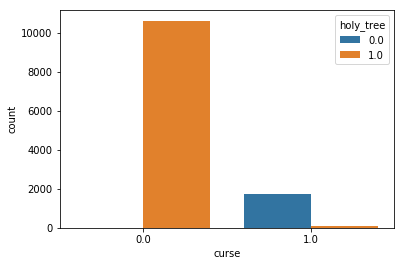

In [331]:
ax=sns.countplot(x='curse',data=d1,hue='holy_tree')


In [335]:
d1['curse'].value_counts()

0.0    13187
1.0     2315
Name: curse, dtype: int64

In [339]:
d1['holy_tree'].value_counts()

1.0    11515
0.0     1719
Name: holy_tree, dtype: int64

In [222]:
df.head()

,house_id,buid_date,date_priced,dst_dock,dst_mkt,dst_tower,dst_river,dining_rooms,bedrooms,bathrooms,...,curse,king_blessing,farm_land,locations,holy_tree,builder,price,house_age,build_year,priced_year
0,6e32cec0,1602-04-21 00:41:00,1609-07-09 01:11:00,138.600639,69.486467,14.394903,63.109038,3.0,4.0,NaN,...,0.0,160,small,King's Landing,yes,data/Bob,1470912.0,2636.0,1602.0,1609.0
1,6e32ceda,1603-10-23 23:14:00,1611-10-21 07:40:00,10.998322,63.794375,53.019891,17.045949,4.0,3.0,3.0,...,0.0,37,huge,The Mountains,yes,data/Bob,1052137.0,2919.0,1603.0,1611.0
2,6e32cf09,1603-03-18 03:53:00,1610-05-17 21:36:00,52.819705,96.656914,70.965631,6.548119,2.0,2.0,3.0,...,0.0,79,small,Cursed Land,yes,data/Bob,1017577.0,2617.0,1603.0,1610.0
3,6e32cfa9,1606-08-18 00:23:00,1608-01-20 10:45:00,82.283966,29.043012,119.126593,24.298255,NaN,2.0,3.0,...,1.0,156,small,Cursed Land,no,data/Bob,1409057.0,520.0,1606.0,1608.0
4,6e32cfb7,1603-09-11 11:53:00,1611-05-20 16:49:00,34.524141,6.740951,222.341302,1.821655,4.0,2.0,4.0,...,0.0,74,small,The Mountains,yes,data/Bob,1317434.0,2808.0,1603.0,1611.0


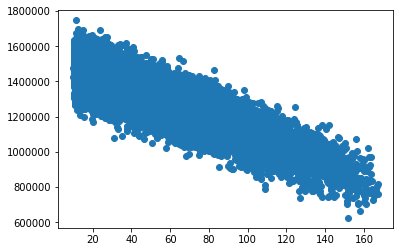

In [6]:
plt.scatter(x='dst_knight',y='price',data=df)

In [ ]:
sns.distplot(df['price'],)

In [164]:
df.head()

,house_id,buid_date,date_priced,garden,dst_dock,dst_capital,dst_mkt,dst_tower,dst_river,renovation,...,bathrooms,king_visit,curse,king_blessing,farm_land,locations,holy_tree,dst_knight,builder,price
0,6e32cec0,4/21/1602 12:41 AM,7/9/1609 1:11 AM,0.0,138.600639,0.256239,69.486467,14.394903,63.109038,0.0,...,NaN,0,0.0,160,small,King's Landing,yes,10.505662,data/Bob,1470912.0
1,6e32ceda,10/23/1603 11:14 PM,10/21/1611 7:40 AM,0.0,10.998322,122.930753,63.794375,53.019891,17.045949,0.0,...,3.0,0,0.0,37,huge,The Mountains,yes,132.934312,data/Bob,1052137.0
2,6e32cf09,3/18/1603 3:53 AM,5/17/1610 9:36 PM,0.0,52.819705,80.970959,96.656914,70.965631,6.548119,0.0,...,3.0,0,0.0,79,small,Cursed Land,yes,91.425357,data/Bob,1017577.0
3,6e32cfa9,8/18/1606 12:23 AM,1/20/1608 10:45 AM,0.0,82.283966,4.331436,29.043012,119.126593,24.298255,0.0,...,3.0,0,1.0,156,small,Cursed Land,no,14.695102,data/Bob,1409057.0
4,6e32cfb7,9/11/1603 11:53 AM,5/20/1611 4:49 PM,0.0,34.524141,NaN,6.740951,222.341302,1.821655,0.0,...,4.0,0,0.0,74,small,The Mountains,yes,NaN,data/Bob,1317434.0


In [11]:
df.describe()

,garden,dst_dock,dst_capital,dst_mkt,dst_tower,dst_river,renovation,dining_rooms,bedrooms,bathrooms,king_visit,curse,king_blessing,dst_knight,price
count,14515.000000,14859.000000,15669.000000,14146.000000,15956.000000,16500.000000,14871.000000,14862.000000,15851.000000,15536.000000,15097.0,15502.000000,16500.000000,15669.000000,1.650000e+04
mean,0.096659,46.305520,42.674021,48.715817,101.110421,30.288848,0.195817,3.001615,3.001514,3.007209,0.0,0.149336,115.142545,53.169633,1.306901e+06
std,0.295503,35.131047,34.365941,34.960087,66.389095,22.036027,0.396842,0.816358,0.813605,0.820371,0.0,0.356430,34.806516,34.367460,1.628483e+05
min,0.000000,0.000288,0.000714,0.011985,0.012093,0.007765,0.000000,2.000000,2.000000,2.000000,0.0,0.000000,3.000000,10.035601,6.250830e+05
25%,0.000000,17.746333,14.876478,20.455767,47.177363,12.515697,0.000000,2.000000,2.000000,2.000000,0.0,0.000000,90.000000,25.383901,1.208923e+06
50%,0.000000,37.969819,33.599468,41.463328,91.626909,25.352928,0.000000,3.000000,3.000000,3.000000,0.0,0.000000,124.000000,44.084289,1.330423e+06
75%,0.000000,68.468817,63.844377,71.184760,146.311675,44.503404,0.000000,4.000000,4.000000,4.000000,0.0,0.000000,144.000000,74.390126,1.425944e+06
max,1.000000,157.658673,156.893349,157.857240,297.334188,99.260600,1.000000,4.000000,4.000000,4.000000,0.0,1.000000,160.000000,167.131365,1.747559e+06


In [53]:
df.groupby('garden',axis=0).count()

,house_id,buid_date,date_priced,dst_dock,dst_capital,dst_mkt,dst_tower,dst_river,renovation,dining_rooms,...,bathrooms,king_visit,curse,king_blessing,farm_land,locations,holy_tree,dst_knight,builder,price
garden,,,,,,,,,,,,,,,,,,,,,
0.0,13112,13112,13112,11825,12436,11259,12680,13112,11804,11826,...,12341,13112,12319,13112,13112,11795,10526,12436,13112,13112
1.0,1403,1403,1403,1240,1335,1197,1359,1403,1258,1255,...,1320,0,1322,1403,1403,1256,1126,1335,1403,1403


In [123]:
pd.value_counts(df['garden'])

0.0    13112
1.0     1403
Name: garden, dtype: int64

In [124]:
pd.value_counts(df['king_visit'])

0.0    15097
Name: king_visit, dtype: int64

In [12]:
import datetime

In [13]:
datetime.datetime.today()

datetime.datetime(2018, 3, 30, 9, 49, 4, 69981)

In [14]:
datetime.date(x)

TypeError: cannot convert the series to <class 'int'>

In [130]:
z[0]=z[0].strip()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [132]:
x=z[0].split(' ')
df.loc()

In [135]:
x[0].split('/')

['4', '21', '1602']

In [ ]:
def fun_day(row):
    x=row['build_date'].split()
    x[0].split




df['b_day']=df.apply(lambda i :fun_day(i),axis=1)
df['b_mon']=df.apply(lambda i :fun_mon(i),axis=1)
df['b_year']=df.apply(lambda i :fun_year(i),axis=1)
df['b_hour']=df.apply(lambda i :fun_hour(i),axis=1)

df['p_day']=df.apply(lambda i :fun_day_p(i),axis=1)
df['p_mon']=df.apply(lambda i :fun_mon_p(i),axis=1)
df['p_year']=df.apply(lambda i :fun_year_p(i),axis=1)
df['p_hour']=df.apply(lambda i :fun_hour_p(i),axis=1)

In [349]:
x=df['buid_date'][3]

In [350]:
x.year

1606

In [351]:
x.month

8

In [207]:
#y=datetime.strptime(z1, '%m/%d/%Y %I:%M %p')

In [202]:
x=x.strftime('%m/%d/%Y %I:%M %p')

In [203]:
y=y.strftime('%m/%d/%Y %I:%M %p')

In [212]:
z.days


2636

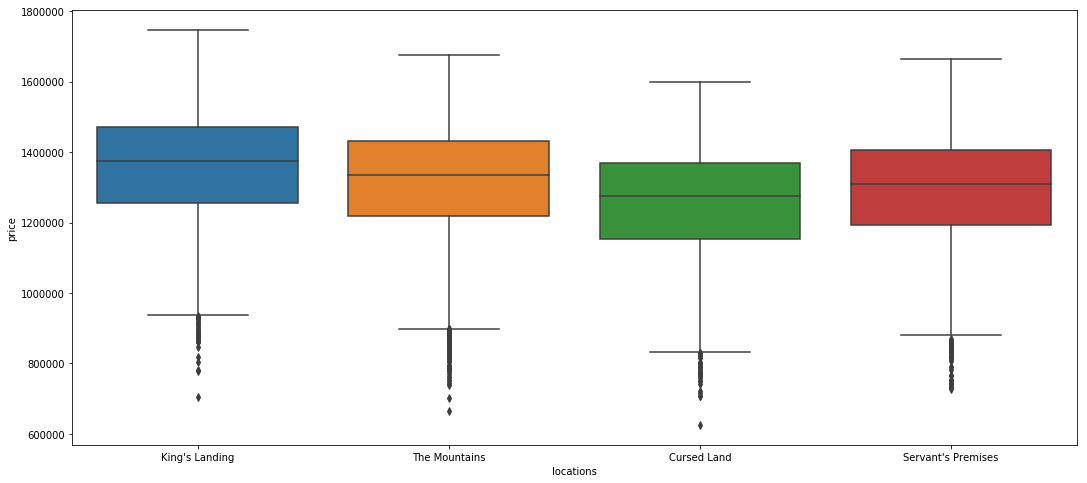

In [312]:
plt.figure(figsize=[18,8])
sns.boxplot(y='price',x='locations',data=df)

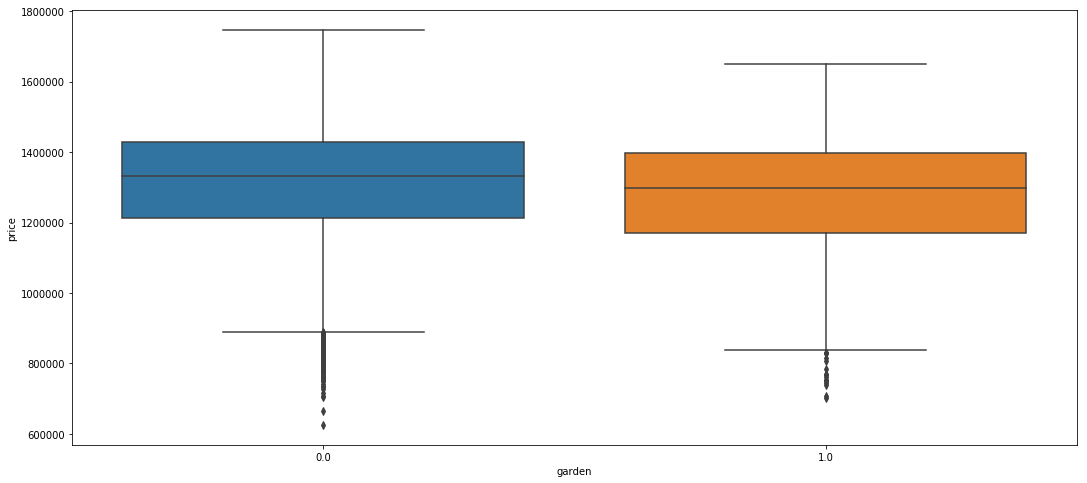

In [313]:
plt.figure(figsize=[18,8])
sns.boxplot(y='price',x='garden',data=df)

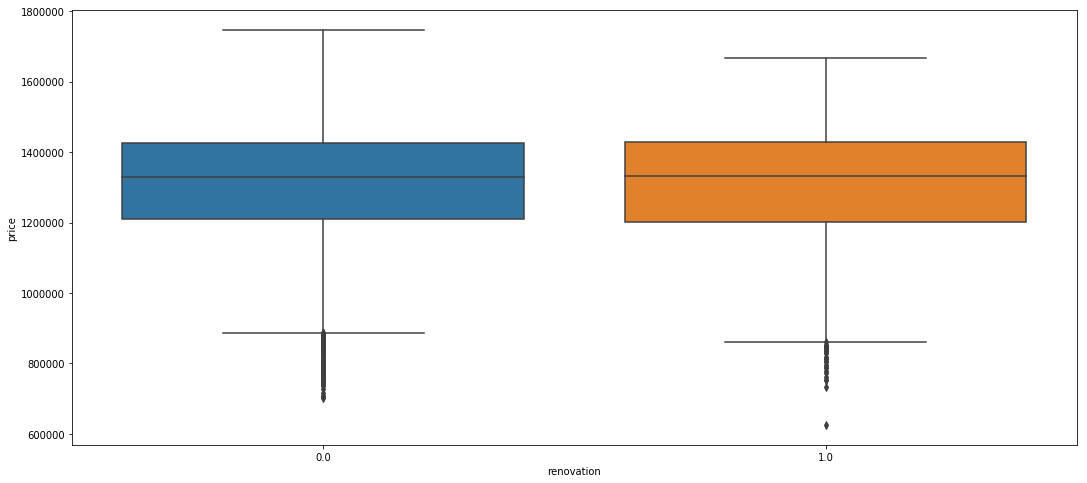

In [314]:
plt.figure(figsize=[18,8])
sns.boxplot(y='price',x='renovation',data=df)

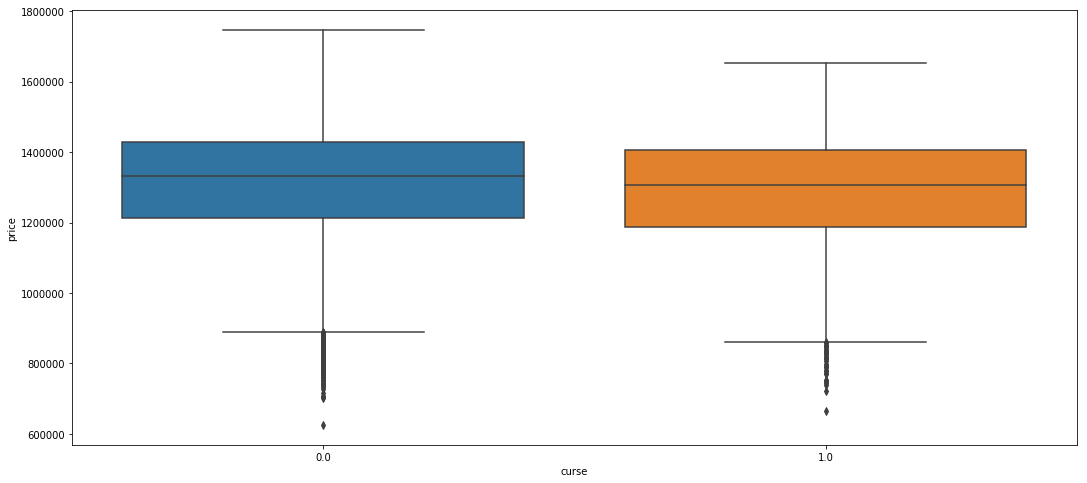

In [315]:
plt.figure(figsize=[18,8])
sns.boxplot(y='price',x='curse',data=df)

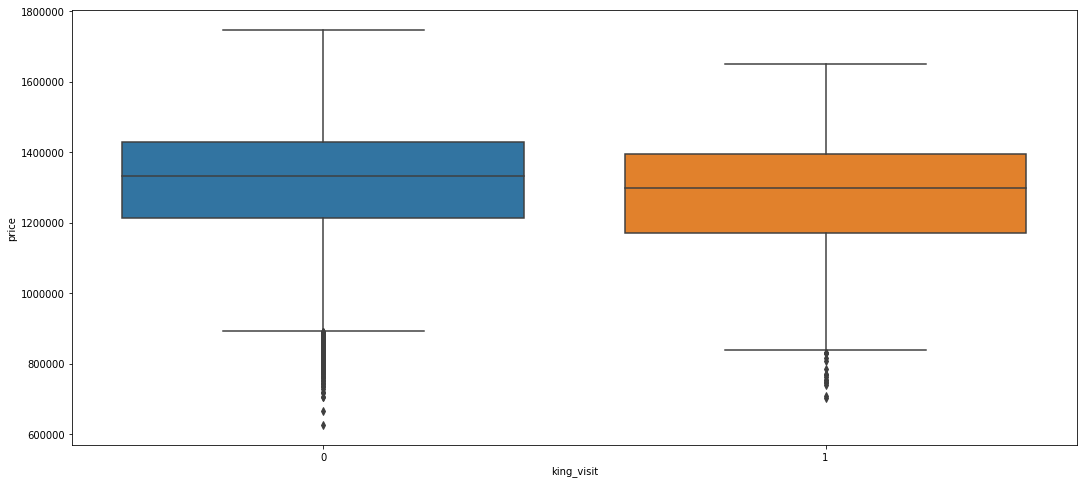

In [316]:
plt.figure(figsize=[18,8])
sns.boxplot(y='price',x='king_visit',data=df)

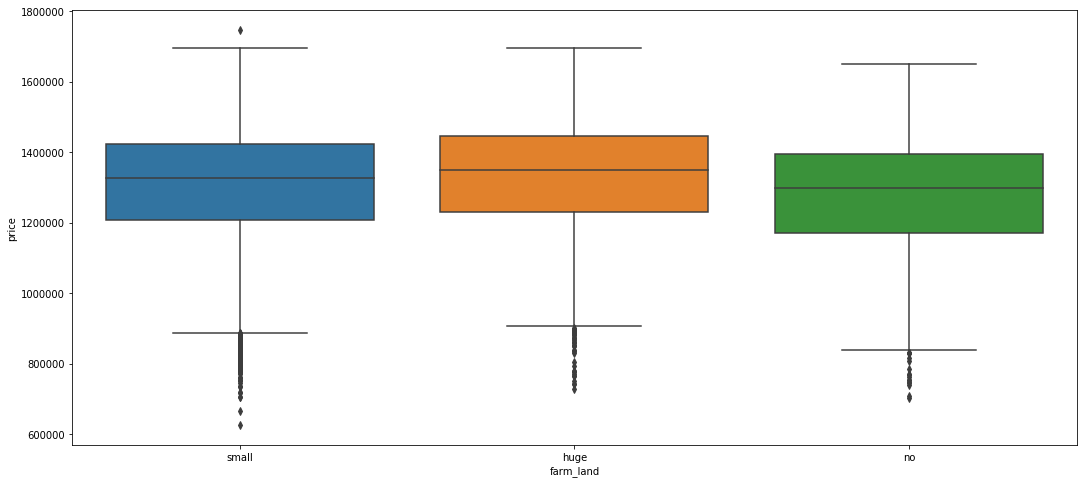

In [317]:
plt.figure(figsize=[18,8])
sns.boxplot(y='price',x='farm_land',data=df)

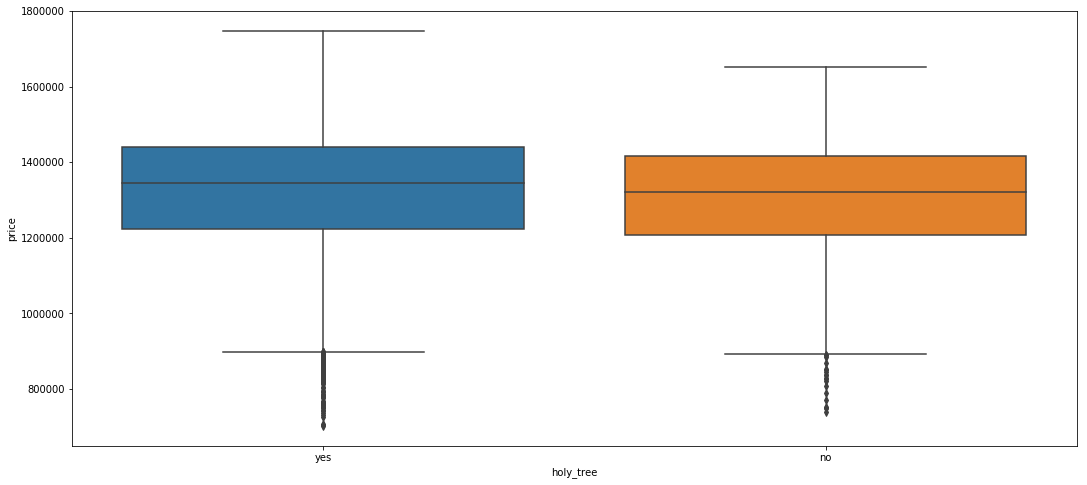

In [318]:
plt.figure(figsize=[18,8])
sns.boxplot(y='price',x='holy_tree',data=df)

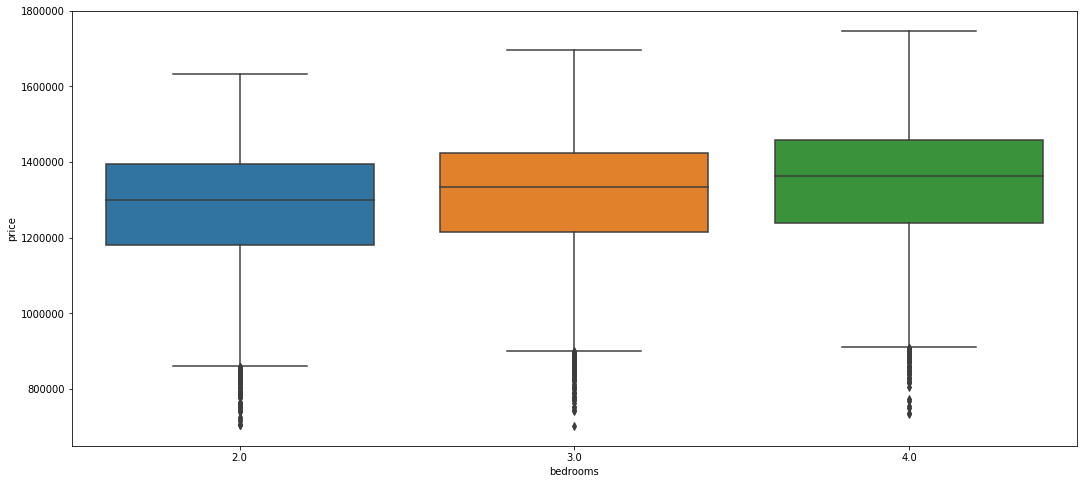

In [319]:
plt.figure(figsize=[18,8])
sns.boxplot(y='price',x='bedrooms',data=df)

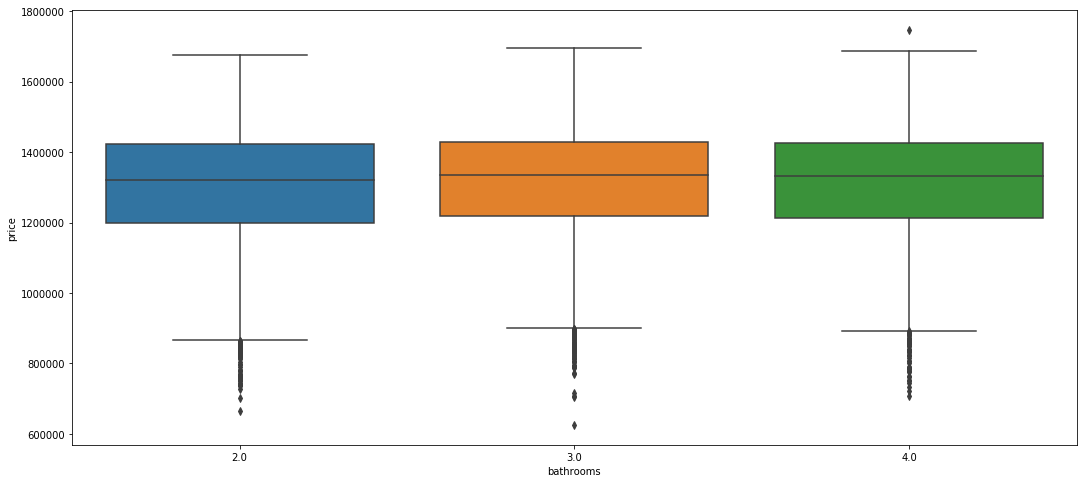

In [320]:
plt.figure(figsize=[18,8])
sns.boxplot(y='price',x='bathrooms',data=df)

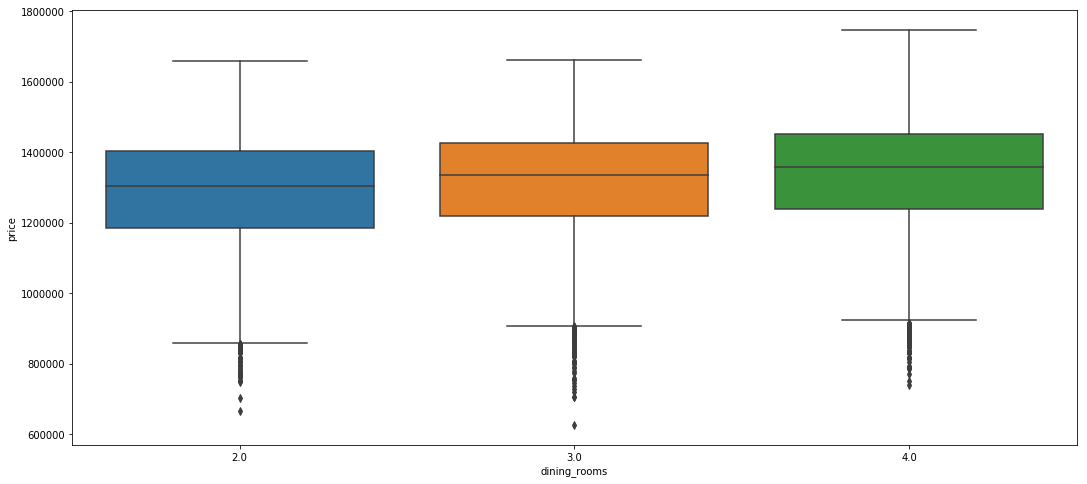

In [325]:
plt.figure(figsize=[18,8])
sns.boxplot(y='price',x='dining_rooms',data=df)

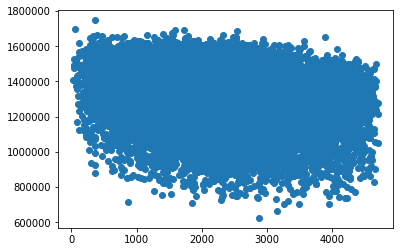

In [327]:
plt.scatter(y='price',x='house_age',data=df)

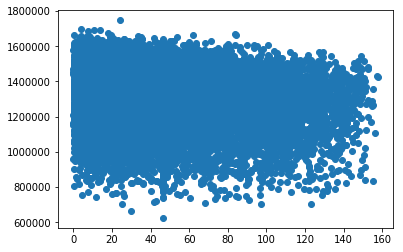

In [328]:
plt.scatter(y='price',x='dst_dock',data=df)

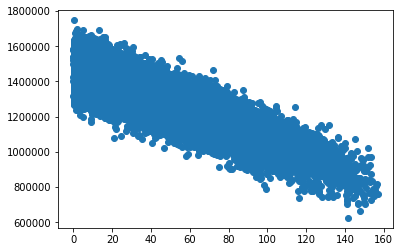

In [329]:
plt.scatter(y='price',x='dst_capital',data=df)

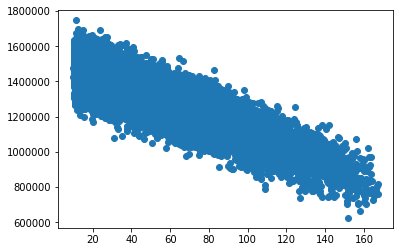

In [330]:
plt.scatter(y='price',x='dst_knight',data=df)

(array([  1.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          4.00000000e+00,   5.00000000e+00,   1.30000000e+01,
          1.70000000e+01,   1.70000000e+01,   2.50000000e+01,
          4.20000000e+01,   5.40000000e+01,   6.20000000e+01,
          9.00000000e+01,   1.01000000e+02,   1.31000000e+02,
          1.59000000e+02,   1.74000000e+02,   2.05000000e+02,
          2.48000000e+02,   2.59000000e+02,   3.10000000e+02,
          3.34000000e+02,   3.99000000e+02,   4.08000000e+02,
          5.06000000e+02,   5.56000000e+02,   6.14000000e+02,
          6.96000000e+02,   7.38000000e+02,   8.36000000e+02,
          8.88000000e+02,   9.12000000e+02,   9.51000000e+02,
          1.03800000e+03,   9.32000000e+02,   9.56000000e+02,
          8.54000000e+02,   7.28000000e+02,   6.92000000e+02,
          5.08000000e+02,   3.79000000e+02,   2.60000000e+02,
          1.85000000e+02,   1.19000000e+02,   5.70000000e+01,
          2.10000000e+01,   1.00000000e+01,   4.00000000e+00,
        

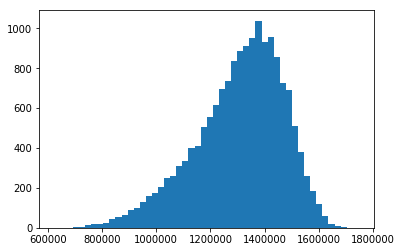

In [335]:
plt.hist(df['price'],bins=50)

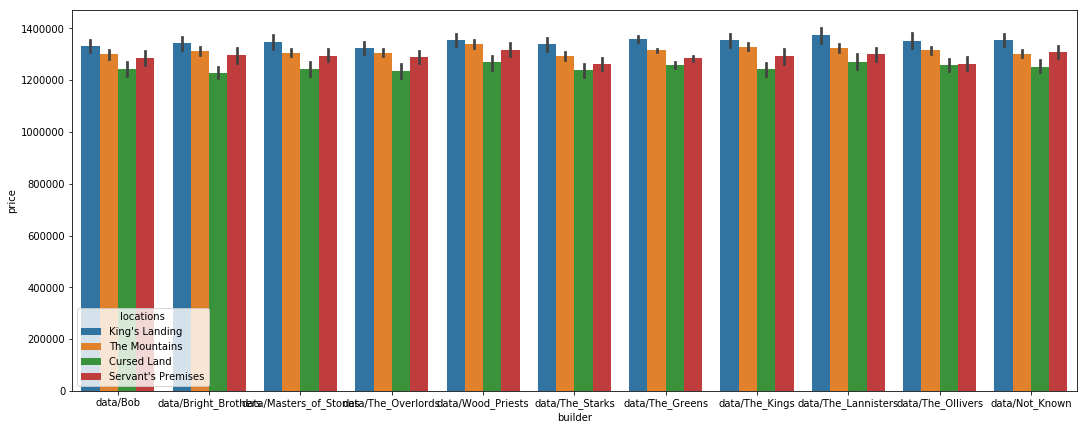

In [345]:
plt.figure(figsize=(18,7))
sns.barplot(x='builder',y='price',data=df,hue='locations')

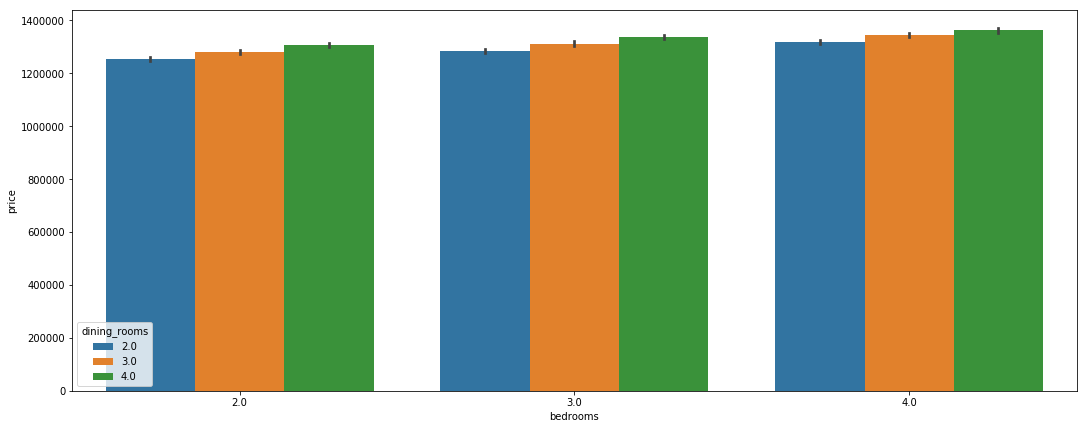

In [347]:
plt.figure(figsize=(18,7))
sns.barplot(x='bedrooms',y='price',data=df,hue='dining_rooms')

In [323]:
df.columns

Index(['house_id', 'buid_date', 'date_priced', 'garden', 'dst_dock',
       'dst_capital', 'dst_mkt', 'dst_tower', 'dst_river', 'renovation',
       'dining_rooms', 'bedrooms', 'bathrooms', 'king_visit', 'curse',
       'king_blessing', 'farm_land', 'locations', 'holy_tree', 'dst_knight',
       'builder', 'price', 'house_age'],
      dtype='object')

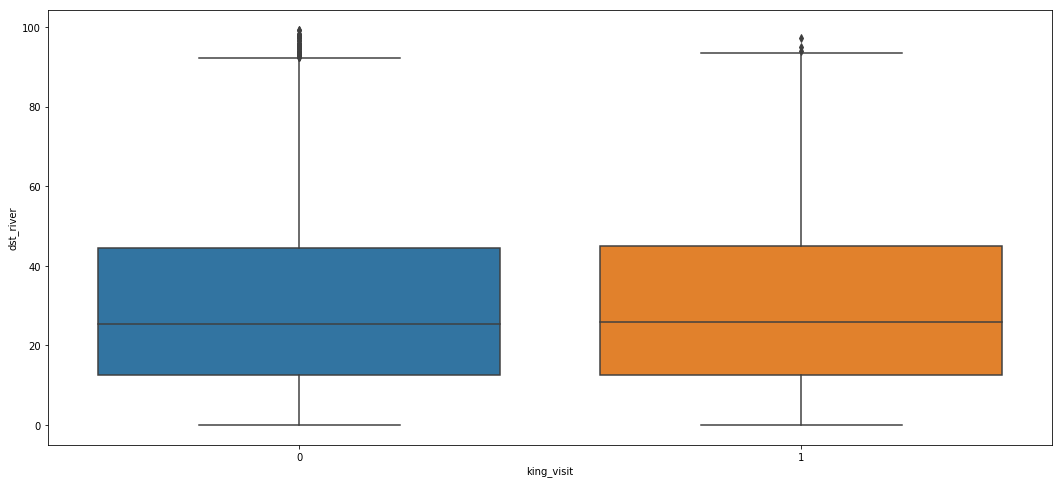

In [376]:
plt.figure(figsize=[18,8])
sns.boxplot(y='dst_river',x='king_visit',data=df)

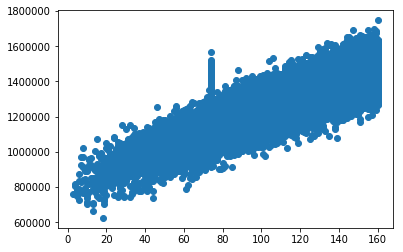

In [379]:
plt.scatter(x='king_blessing',y='price',data=df)

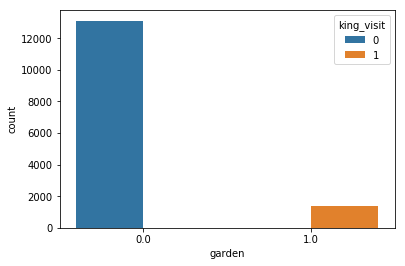

In [235]:
#plt.figure(figsize=(18,7))
sns.countplot(x='garden',data=df,hue='king_visit')

In [239]:
df.isnull().count()

house_id         16500
buid_date        16500
date_priced      16500
garden           16500
dst_dock         16500
dst_capital      16500
dst_mkt          16500
dst_tower        16500
dst_river        16500
renovation       16500
dining_rooms     16500
bedrooms         16500
bathrooms        16500
king_visit       16500
curse            16500
king_blessing    16500
farm_land        16500
locations        16500
holy_tree        16500
dst_knight       16500
builder          16500
price            16500
house_age        16500
build_year       16500
priced_year      16500
dtype: int64

In [181]:
from datetime import datetime

war_start = '2011-01-03'
datetime.strptime(dt_str, '%m/%d/%Y %I:%M:%S %p')

datetime.datetime(2011, 1, 3, 0, 0)

In [23]:
w=df.dropna(thresh=15)

In [26]:

w.isnull().values.sum()

19001

In [22]:
df.columns.size

25

In [121]:
x=df[['king_blessing','dst_capital','dst_knight']]

In [122]:
x.index.size

16500

In [123]:
x.dropna(thresh=1).index.size

16500

In [124]:
x.dropna(thresh=2).index.size

15669

In [125]:
x.dropna(thresh=3).index.size

0

# dst_capital and dst_knight both miss at same time

In [120]:
x.isnull().sum()

king_blessing      0
dst_capital      831
dst_knight       831
dtype: int64

In [78]:

x[['dst_capital','dst_knight']]

,dst_capital,dst_knight
0,0.256239,10.505662
1,122.930753,132.934312
2,80.970959,91.425357
3,4.331436,14.695102
4,NaN,NaN
5,25.065928,35.568437
6,4.570255,15.068711
7,107.184545,117.410316
8,101.610694,112.494554
9,29.541134,40.454345


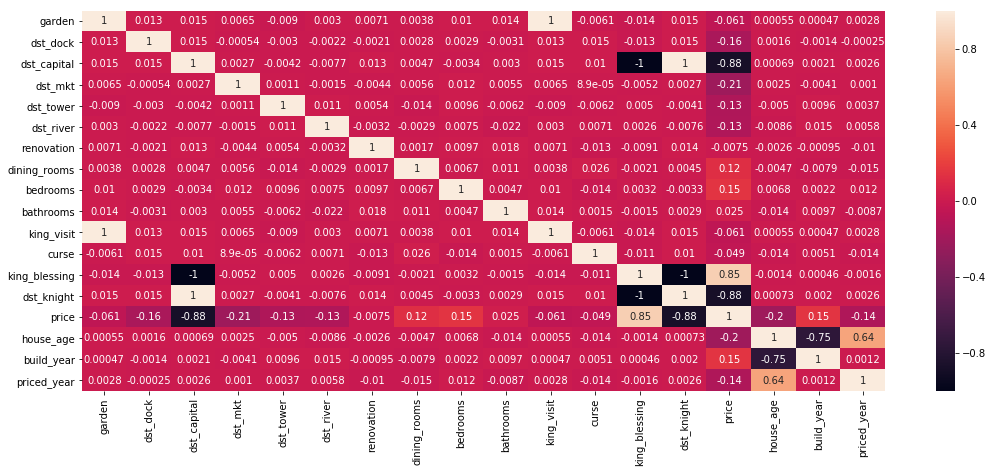

In [54]:
plt.figure(figsize=(18,7))
sns.heatmap(c,annot=True)

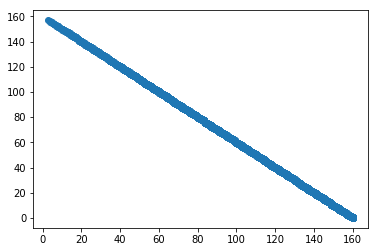

In [88]:
plt.scatter(x='king_blessing',y='dst_capital',data=x)

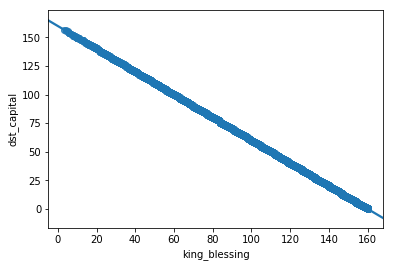

In [102]:
sns.regplot(x='king_blessing',y='dst_capital',data=x)

# king_blessing  and dst_capital are in linear regration 

In [103]:
x['dst_capital'].fillna()

NameError: name 'fillna' is not defined

In [148]:
x1=x.set_index('king_blessing')

AttributeError: 'list' object has no attribute 'set_index'

In [107]:
x1.index.size

16500

In [108]:
x1=x1.interpolate()

In [150]:
x1.isnull().sum()

king_blessing    0
dst_capital      0
dst_knight       0
dtype: int64

In [152]:
x=df

In [168]:
x['new_col']=-df['dst_dock']

In [169]:
c=x.corr()

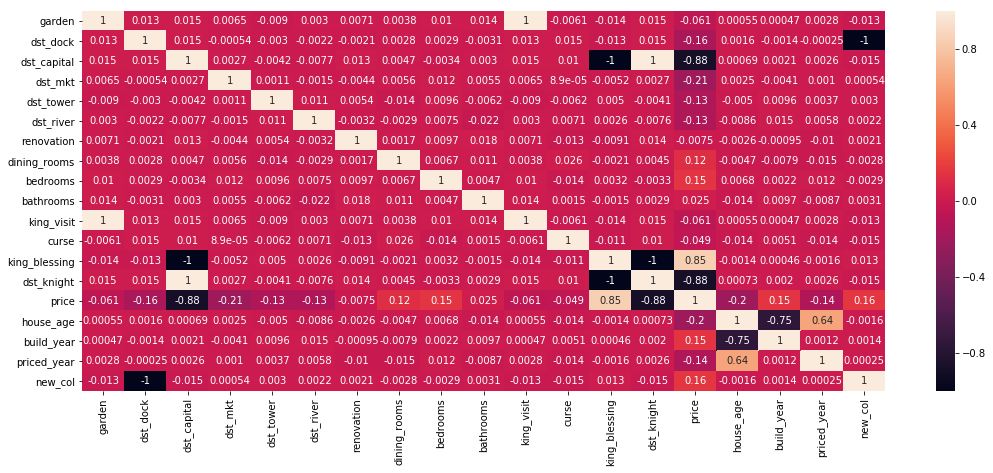

In [170]:
plt.figure(figsize=(18,7))
sns.heatmap(c,annot=True)